<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [79]:
data = np.load('/Users/matthewdmeans/unit4/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

X = data['arr_0']
y = data['arr_1']

print(X.shape, y.shape)

(100000, 784) (100000,)


In [80]:
def load_quickdraw(path):
    
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X = X.astype('float32') / 255

  return train_test_split(X, y, test_size=.2, random_state=42)

In [81]:
X_train, X_test, y_train, y_test = load_quickdraw('/Users/matthewdmeans/unit4/DS-Unit-4-Sprint-2-Neural-Networks/quickdraw10.npz')

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [72]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers

In [82]:
##### Your Code Here #####

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')]
)
    
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [83]:
qd_model = create_model()

In [84]:
qd_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [85]:
qd_model_32 = create_model()

bt_default= qd_model.fit(X_train, y_train,
                        epochs=25, batch_size=32,
                        validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 2s 890us/step - loss: 1.1350 - accuracy: 0.6557 - val_loss: 0.8567 - val_accuracy: 0.7522
Epoch 2/25
2500/2500 [==============================] - 2s 886us/step - loss: 0.8001 - accuracy: 0.7677 - val_loss: 0.7508 - val_accuracy: 0.7832
Epoch 3/25
2500/2500 [==============================] - 2s 884us/step - loss: 0.7207 - accuracy: 0.7898 - val_loss: 0.6962 - val_accuracy: 0.7959
Epoch 4/25
2500/2500 [==============================] - 2s 894us/step - loss: 0.6720 - accuracy: 0.8025 - val_loss: 0.6626 - val_accuracy: 0.8058
Epoch 5/25
2500/2500 [==============================] - 2s 968us/step - loss: 0.6366 - accuracy: 0.8116 - val_loss: 0.6332 - val_accuracy: 0.8120
Epoch 6/25
2500/2500 [==============================] - 2s 901us/step - loss: 0.6087 - accuracy: 0.8202 - val_loss: 0.6100 - val_accuracy: 0.8191
Epoch 7/25
2500/2500 [==============================] - 2s 928us/step - loss: 0.5870 - accuracy: 0.8258 - val_loss: 0.5988 -

In [86]:
qd_model_16 = create_model()

bt_16= qd_model.fit(X_train, y_train,
                        epochs=25, batch_size=16,
                        validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4574 - accuracy: 0.8634 - val_loss: 0.5377 - val_accuracy: 0.8430
Epoch 2/25
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4506 - accuracy: 0.8647 - val_loss: 0.5269 - val_accuracy: 0.8443
Epoch 3/25
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4440 - accuracy: 0.8667 - val_loss: 0.5190 - val_accuracy: 0.8474
Epoch 4/25
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4385 - accuracy: 0.8689 - val_loss: 0.5184 - val_accuracy: 0.8472
Epoch 5/25
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4324 - accuracy: 0.8701 - val_loss: 0.5190 - val_accuracy: 0.8458
Epoch 6/25
5000/5000 [==============================] - 6s 1ms/step - loss: 0.4274 - accuracy: 0.8719 - val_loss: 0.5187 - val_accuracy: 0.8488
Epoch 7/25
5000/5000 [==============================] - 7s 1ms/step - loss: 0.4233 - accuracy: 0.8729 - val_loss: 0.5173 - val_accuracy:

In [90]:
qd_model_64 = create_model()

bt_64 = qd_model.fit(X_train, y_train,
                        epochs=25, batch_size=64,
                        validation_data=(X_test, y_test))

Epoch 1/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3334 - accuracy: 0.8990 - val_loss: 0.5304 - val_accuracy: 0.8505
Epoch 2/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3215 - accuracy: 0.9036 - val_loss: 0.5348 - val_accuracy: 0.8503
Epoch 3/25
1250/1250 [==============================] - 2s 2ms/step - loss: 0.3181 - accuracy: 0.9047 - val_loss: 0.5407 - val_accuracy: 0.8486
Epoch 4/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3159 - accuracy: 0.9052 - val_loss: 0.5390 - val_accuracy: 0.8486
Epoch 5/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3140 - accuracy: 0.9057 - val_loss: 0.5395 - val_accuracy: 0.8496
Epoch 6/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3132 - accuracy: 0.9065 - val_loss: 0.5405 - val_accuracy: 0.8470
Epoch 7/25
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3126 - accuracy: 0.9068 - val_loss: 0.5405 - val_accuracy:

In [92]:
qd_model_128 = create_model()

bt_128 = qd_model.fit(X_train, y_train,
                        epochs=25, batch_size=128,
                        validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 3s 5ms/step - loss: 0.3229 - accuracy: 0.9026 - val_loss: 0.5311 - val_accuracy: 0.8497
Epoch 2/25
625/625 [==============================] - 3s 5ms/step - loss: 0.3134 - accuracy: 0.9065 - val_loss: 0.5307 - val_accuracy: 0.8497
Epoch 3/25
625/625 [==============================] - 3s 5ms/step - loss: 0.3096 - accuracy: 0.9076 - val_loss: 0.5297 - val_accuracy: 0.8514
Epoch 4/25
625/625 [==============================] - 3s 5ms/step - loss: 0.3070 - accuracy: 0.9079 - val_loss: 0.5313 - val_accuracy: 0.8504
Epoch 5/25
625/625 [==============================] - 4s 6ms/step - loss: 0.3052 - accuracy: 0.9091 - val_loss: 0.5334 - val_accuracy: 0.8504
Epoch 6/25
625/625 [==============================] - 3s 5ms/step - loss: 0.3040 - accuracy: 0.9093 - val_loss: 0.5330 - val_accuracy: 0.8504
Epoch 7/25
625/625 [==============================] - 3s 4ms/step - loss: 0.3026 - accuracy: 0.9099 - val_loss: 0.5342 - val_accuracy: 0.8503
Epoch 

In [93]:
qd_model_8 = create_model()

bt_8 = qd_model.fit(X_train, y_train,
                        epochs=25, batch_size=8,
                        validation_data=(X_test, y_test))

Epoch 1/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3784 - accuracy: 0.8817 - val_loss: 0.5903 - val_accuracy: 0.8350
Epoch 2/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3730 - accuracy: 0.8835 - val_loss: 0.5511 - val_accuracy: 0.8438
Epoch 3/25
10000/10000 [==============================] - 15s 2ms/step - loss: 0.3686 - accuracy: 0.8850 - val_loss: 0.5575 - val_accuracy: 0.8418
Epoch 4/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3648 - accuracy: 0.8866 - val_loss: 0.5999 - val_accuracy: 0.8341
Epoch 5/25
10000/10000 [==============================] - 13s 1ms/step - loss: 0.3613 - accuracy: 0.8880 - val_loss: 0.5636 - val_accuracy: 0.8414
Epoch 6/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.3593 - accuracy: 0.8887 - val_loss: 0.5462 - val_accuracy: 0.8464
Epoch 7/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.3575 - accuracy: 0.8894 - val_loss: 0

In [95]:
batch_sizes = []

for exp, result in zip([bt_default, bt_16, bt_8, bt_64, bt_128], ["32_","16_","8_","64_","128_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['batch_size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['batch_size'] = df['batch_size'].astype('str')

In [96]:
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,batch_size
0,0.341702,0.898600,0.509184,0.85265,0,32_
1,0.338868,0.899475,0.510581,0.85100,1,32_
2,0.337886,0.899288,0.510828,0.85235,2,32_
3,0.336602,0.900000,0.514368,0.85230,3,32_
4,0.336042,0.899675,0.515323,0.85250,4,32_


<AxesSubplot:xlabel='epoch', ylabel='val_accuracy'>

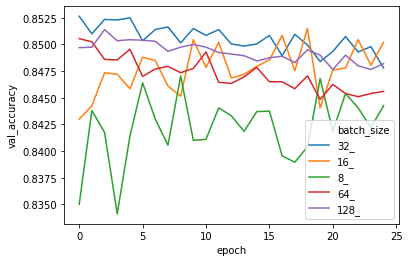

In [98]:
sns.lineplot(x='epoch', y='val_accuracy', hue='batch_size', data=df)

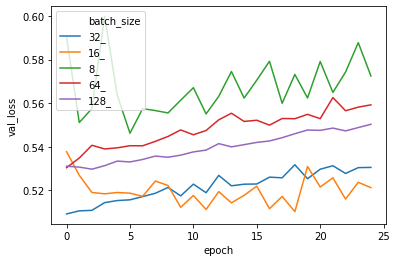

In [99]:
sns.lineplot(x='epoch', y='val_loss', hue='batch_size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [102]:
lr_model_1 = create_model(lr=1)

bt_1 = lr_model_1.fit(X_train, y_train,
                     epochs=25,
                     batch_size=128,
                     validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 1s 2ms/step - loss: 0.9625 - accuracy: 0.6885 - val_loss: 0.6747 - val_accuracy: 0.7932
Epoch 2/25
625/625 [==============================] - 1s 2ms/step - loss: 0.6779 - accuracy: 0.7917 - val_loss: 0.6871 - val_accuracy: 0.7922
Epoch 3/25
625/625 [==============================] - 1s 1ms/step - loss: 0.6245 - accuracy: 0.8080 - val_loss: 0.6035 - val_accuracy: 0.8134
Epoch 4/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5894 - accuracy: 0.8185 - val_loss: 0.6092 - val_accuracy: 0.8148
Epoch 5/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5695 - accuracy: 0.8245 - val_loss: 0.5873 - val_accuracy: 0.8235
Epoch 6/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.8296 - val_loss: 0.6318 - val_accuracy: 0.8128
Epoch 7/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.8301 - val_loss: 0.5850 - val_accuracy: 0.8202
Epoch 

In [103]:
lr_model_01 = create_model(lr=.1)

bt_01 = lr_model_01.fit(X_train, y_train,
                     epochs=25,
                     batch_size=128,
                     validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 1s 2ms/step - loss: 0.9788 - accuracy: 0.6996 - val_loss: 0.7868 - val_accuracy: 0.7660
Epoch 2/25
625/625 [==============================] - 1s 2ms/step - loss: 0.7024 - accuracy: 0.7919 - val_loss: 0.6377 - val_accuracy: 0.8105
Epoch 3/25
625/625 [==============================] - 1s 1ms/step - loss: 0.6162 - accuracy: 0.8162 - val_loss: 0.5942 - val_accuracy: 0.8202
Epoch 4/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5699 - accuracy: 0.8294 - val_loss: 0.5606 - val_accuracy: 0.8328
Epoch 5/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5408 - accuracy: 0.8379 - val_loss: 0.5614 - val_accuracy: 0.8320
Epoch 6/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5197 - accuracy: 0.8444 - val_loss: 0.5319 - val_accuracy: 0.8397
Epoch 7/25
625/625 [==============================] - 1s 1ms/step - loss: 0.5024 - accuracy: 0.8491 - val_loss: 0.5352 - val_accuracy: 0.8380
Epoch 

In [104]:
lr_model_001 = create_model(lr=.001)

bt_001 = lr_model_001.fit(X_train, y_train,
                     epochs=25,
                     batch_size=128,
                     validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 1s 2ms/step - loss: 2.2954 - accuracy: 0.1655 - val_loss: 2.2485 - val_accuracy: 0.2137
Epoch 2/25
625/625 [==============================] - 1s 1ms/step - loss: 2.1975 - accuracy: 0.2595 - val_loss: 2.1408 - val_accuracy: 0.2910
Epoch 3/25
625/625 [==============================] - 1s 1ms/step - loss: 2.0734 - accuracy: 0.3283 - val_loss: 2.0030 - val_accuracy: 0.3589
Epoch 4/25
625/625 [==============================] - 1s 1ms/step - loss: 1.9277 - accuracy: 0.3939 - val_loss: 1.8538 - val_accuracy: 0.4273
Epoch 5/25
625/625 [==============================] - 1s 1ms/step - loss: 1.7799 - accuracy: 0.4548 - val_loss: 1.7106 - val_accuracy: 0.4800
Epoch 6/25
625/625 [==============================] - 1s 1ms/step - loss: 1.6425 - accuracy: 0.5027 - val_loss: 1.5812 - val_accuracy: 0.5214
Epoch 7/25
625/625 [==============================] - 1s 1ms/step - loss: 1.5236 - accuracy: 0.5400 - val_loss: 1.4730 - val_accuracy: 0.5529
Epoch 

In [105]:
lr_model_0001 = create_model(lr=.0001)

bt_0001 = lr_model_0001.fit(X_train, y_train,
                     epochs=25,
                     batch_size=128,
                     validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3398 - accuracy: 0.0983 - val_loss: 2.3287 - val_accuracy: 0.1009
Epoch 2/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3195 - accuracy: 0.1016 - val_loss: 2.3106 - val_accuracy: 0.1054
Epoch 3/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3035 - accuracy: 0.1062 - val_loss: 2.2959 - val_accuracy: 0.1117
Epoch 4/25
625/625 [==============================] - 1s 1ms/step - loss: 2.2901 - accuracy: 0.1128 - val_loss: 2.2834 - val_accuracy: 0.1200
Epoch 5/25
625/625 [==============================] - 1s 1ms/step - loss: 2.2782 - accuracy: 0.1202 - val_loss: 2.2720 - val_accuracy: 0.1270
Epoch 6/25
625/625 [==============================] - 1s 1ms/step - loss: 2.2674 - accuracy: 0.1277 - val_loss: 2.2614 - val_accuracy: 0.1359
Epoch 7/25
625/625 [==============================] - 1s 1ms/step - loss: 2.2572 - accuracy: 0.1359 - val_loss: 2.2513 - val_accuracy: 0.1427
Epoch 

In [106]:
lr_model_00001 = create_model(lr=.00001)

bt_00001 = lr_model_00001.fit(X_train, y_train,
                     epochs=25,
                     batch_size=128,
                     validation_data=(X_test, y_test))

Epoch 1/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3262 - accuracy: 0.1164 - val_loss: 2.3244 - val_accuracy: 0.1168
Epoch 2/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3237 - accuracy: 0.1165 - val_loss: 2.3221 - val_accuracy: 0.1166
Epoch 3/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3214 - accuracy: 0.1169 - val_loss: 2.3198 - val_accuracy: 0.1168
Epoch 4/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3191 - accuracy: 0.1169 - val_loss: 2.3176 - val_accuracy: 0.1172
Epoch 5/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3169 - accuracy: 0.1172 - val_loss: 2.3155 - val_accuracy: 0.1176
Epoch 6/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3148 - accuracy: 0.1174 - val_loss: 2.3134 - val_accuracy: 0.1178
Epoch 7/25
625/625 [==============================] - 1s 1ms/step - loss: 2.3127 - accuracy: 0.1177 - val_loss: 2.3113 - val_accuracy: 0.1177
Epoch 

In [107]:
batch_sizes = []

for exp, result in zip([bt_1 ,bt_01 ,bt_001, bt_0001, bt_00001], ["1_", ".1_", ".01_",".001_",".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['lr'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['lr'] = df['lr'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,lr
0,0.962535,0.688537,0.674672,0.79320,0,1_
1,0.677870,0.791700,0.687123,0.79220,1,1_
2,0.624492,0.808012,0.603476,0.81335,2,1_
3,0.589393,0.818500,0.609225,0.81480,3,1_
4,0.569476,0.824525,0.587259,0.82350,4,1_


<AxesSubplot:xlabel='epoch', ylabel='val_accuracy'>

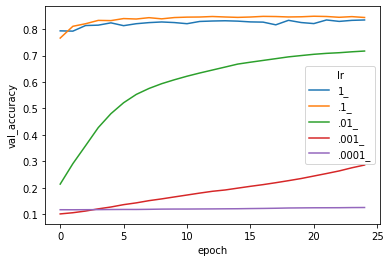

In [108]:
sns.lineplot(x='epoch', y='val_accuracy', hue='lr', data=df)

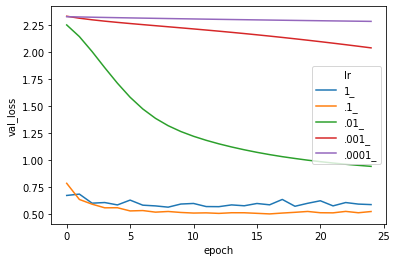

In [109]:
sns.lineplot(x='epoch', y='val_loss', hue='lr', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


